# Workshop 3

Starter code for workshop 3. You should have seen most of it before, but make sure you understand what it is doing!

PS: Modified by Hu Wang

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import pandas as pd

housing = pd.read_csv("workshop3.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


Split the available data 80/20 for training and testing. Don't use the test data until the very end!

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

median_house_value is the value we want to predict, so separate it from the other features.

In [ ]:
X_train = train_set.drop(["median_house_value"], axis=1)
y_train = train_set["median_house_value"].copy()
X_test = test_set.drop(["median_house_value"], axis=1)
y_test = test_set["median_house_value"].copy()

Your code starts here...

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

lr_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()), ('lr',LinearRegression()) ])
lr_pl.fit(X_train,y_train)
y_pred = lr_pl.predict(X_train)

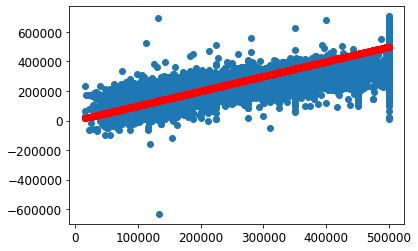

In [ ]:
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'r-o')

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_pred,y_train))  # RMSE
print(rmse_lr)

69411.6554100667


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()), ('kr',KNeighborsRegressor()) ])
knn_pl.fit(X_train,y_train)
y_pred = knn_pl.predict(X_train)
rmse_knn = np.sqrt(mean_squared_error(y_pred,y_train))
print(rmse_knn)

50024.5694885547


In [ ]:
for k in range(3,20):
    for w in ['uniform','distance']:
        knn_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()), ('lr',KNeighborsRegressor(n_neighbors=k, weights=w)) ])
        knn_pl.fit(X_train,y_train)
        y_pred = knn_pl.predict(X_train)
        rmse_knn = np.sqrt(mean_squared_error(y_pred,y_train))
        print(f'RMSE for KNN with k={k} and w={w} is {rmse_knn}')

RMSE for KNN with k=3 and w=uniform is 44946.482457374426
RMSE for KNN with k=3 and w=distance is 0.0
RMSE for KNN with k=4 and w=uniform is 48109.20195609117
RMSE for KNN with k=4 and w=distance is 0.0
RMSE for KNN with k=5 and w=uniform is 50024.5694885547
RMSE for KNN with k=5 and w=distance is 0.0
RMSE for KNN with k=6 and w=uniform is 51495.80610558386
RMSE for KNN with k=6 and w=distance is 0.0
RMSE for KNN with k=7 and w=uniform is 52731.459848586375
RMSE for KNN with k=7 and w=distance is 0.0
RMSE for KNN with k=8 and w=uniform is 53701.107545337065
RMSE for KNN with k=8 and w=distance is 0.0
RMSE for KNN with k=9 and w=uniform is 54427.59277615538
RMSE for KNN with k=9 and w=distance is 0.0
RMSE for KNN with k=10 and w=uniform is 55141.09845299509
RMSE for KNN with k=10 and w=distance is 0.0
RMSE for KNN with k=11 and w=uniform is 55654.61354701113
RMSE for KNN with k=11 and w=distance is 0.0
RMSE for KNN with k=12 and w=uniform is 56127.884542680054
RMSE for KNN with k=12 and

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [ ]:
knn_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()), ('lr',KNeighborsRegressor(n_neighbors=7, weights='uniform')) ])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
cv_res = cross_val_score(knn_pl, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(cv_res)

[-59230.96927355 -64555.74492018 -59652.17512816 -62690.14884724
 -62528.19571102]


In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [ ]:
cv_results = cross_validate(knn_pl, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))

[58742.13651443 64088.40708874 59043.35147794 62056.76522121
 62112.11377142]
61208.55481474889


In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
print('X_train Shape:', X_train.shape)
for train_index, val_index in kf.split(X_train):
    print('train_index Shape:', train_index.shape)
    print('val_index Shape:', val_index.shape)
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    knn_pl.fit(X_trainr,y_trainr)

    y_pred = knn_pl.predict(X_trainr)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for KNN is {rmse_knn}')

    y_pred = knn_pl.predict(X_val)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for KNN is {rmse_knn}')

X_train Shape: (16346, 8)
train_index Shape: (13076,)
val_index Shape: (3270,)
TRAIN RMSE for KNN is 53967.8320833016
VAL RMSE for KNN is 59230.96927354815
train_index Shape: (13077,)
val_index Shape: (3269,)
TRAIN RMSE for KNN is 52975.66959874765
VAL RMSE for KNN is 64555.74492018172
train_index Shape: (13077,)
val_index Shape: (3269,)
TRAIN RMSE for KNN is 53908.34238548822
VAL RMSE for KNN is 59652.17512816217
train_index Shape: (13077,)
val_index Shape: (3269,)
TRAIN RMSE for KNN is 53367.07850889515
VAL RMSE for KNN is 62690.14884724455
train_index Shape: (13077,)
val_index Shape: (3269,)
TRAIN RMSE for KNN is 53288.32731562395
VAL RMSE for KNN is 62528.195711019165


In [ ]:
cv_results = cross_validate(knn_pl, X_train, y_train, cv=5, return_train_score=True, scoring='neg_root_mean_squared_error')
print('train_score', -cv_results['train_score'])
print('test_score', -cv_results['test_score'])
print('mean of test_score', np.mean(-cv_results['test_score']))

train_score [53967.8320833  52975.66959875 53908.34238549 53367.0785089
 53288.32731562]
test_score [59230.96927355 64555.74492018 59652.17512816 62690.14884724
 62528.19571102]
mean of test_score 61731.44677603115


In [ ]:
std_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler())])
std_X_train = std_pl.fit_transform(X_train)

knn_pl = KNeighborsRegressor()
parameters = {'n_neighbors':[3,5,10,20,30,50], 'weights':['uniform','distance']}
gridcv = GridSearchCV(knn_pl, parameters, cv=5, scoring='neg_root_mean_squared_error')
gridcv.fit(std_X_train, y_train)
print(f'Best score is {-gridcv.best_score_} for best params of {gridcv.best_params_}')  

Best score is 61021.07494976645 for best params of {'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
knn_pl.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
gridcv.best_estimator_.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_test_pred = gridcv.best_estimator_.predict(X_test)
print(f'Test RMSE is {np.sqrt(mean_squared_error(y_test_pred,y_test))}')

Test RMSE is 97875.40340872464


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
